In [9]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, normaltest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

In [10]:
#Per Google Colab
#!git clone https://github.com/francescodesantis/corso_progetto.git
#os.chdir('corso_progetto/statistica_esercitazione2/python')

Cloning into 'corso_progetto'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 133 (delta 45), reused 57 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 692.28 KiB | 2.98 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [13]:
print(os.getcwd())

/content/corso_progetto/statistica_esercitazione2/corso_progetto/statistica_esercitazione2/python


In [14]:
mat_data = scipy.io.loadmat('../Data_example4.mat')
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Age', 'Diet', 'Height', 'Person', 'WeightLoss', 'gender'])

In [19]:
import pandas as pd

# Advantages:
# Organized structure: Rows and columns for easy viewing.
# Fast manipulation: Quick filtering, slicing, and calculations.
# Built-in analysis: Easy stats, group-by, and aggregation.
# Integration: Works with visualization and ML libraries.
# Data cleaning: Handle missing or messy data easily.
# Flexible export: Save to CSV, Excel, databases, etc.
# Handles big data: Efficient memory use and performance.
# Rich ecosystem: Lots of tools, docs, and community support.

# Create the dataframe
data = {
    'Age': mat_data['Age'].flatten(),
    'Diet': mat_data['Diet'].flatten(),
    'Height': mat_data['Height'].flatten(),
    'Person': mat_data['Person'].flatten(),
    'WeightLoss': mat_data['WeightLoss'].flatten(),
    'Gender': mat_data['gender'].flatten()
}

# Convert the data into a pandas DataFrame for a tabular view
df = pd.DataFrame(data)

df.head() # Display the table
# df.WeightLoss.hist() # Show a histogram
# df[df['Age'] > 30]  # Filter rows where Age > 30
# df[['Person', 'WeightLoss']]  # Select specific columns
# df.sort_values('Height', ascending=False)  # Sort by Height descending
# df.groupby('Diet')['WeightLoss'].mean()  # Group by Diet and get average WeightLoss
# df['BMI'] = df['WeightLoss'] / (df['Height']/100)**2  # Add new column for BMI
# df.dropna(subset=['Age', 'Height'])  # Drop rows with missing Age or Height
# df.rename(columns={'WeightLoss': 'Weight_Loss'})  # Rename column WeightLoss to Weight_Loss
# df.describe()  # Quick statistics summary


,Age,Diet,Height,Person,WeightLoss,Gender
0,41,2,171,25,0.0,0
1,32,2,174,26,0.0,0
2,22,1,159,1,-3.8,0
3,46,1,192,2,-6.0,0
4,55,1,170,3,-0.7,0


In [20]:
WeightLoss = mat_data['WeightLoss'].flatten()
Diet = mat_data['Diet'].flatten()
gender = mat_data['gender'].flatten()

In [21]:
# WeightLoss = df.WeightLoss
# Diet = df.Diet
# gender = df.Gender

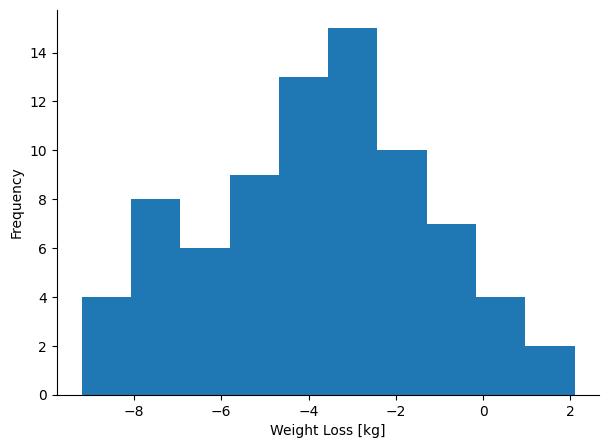

In [22]:
# Preliminary data visualization
fig, ax = plt.subplots(1, figsize = (7,5))

ax.hist(WeightLoss)
ax.set_xlabel('Weight Loss [kg]')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [23]:
_,p = normaltest(WeightLoss)
p

np.float64(0.6617935470237468)

Se p_value del norlmaltest è > 0.05, non posso rifiutare l'ipotesi H0 di normalità

In [24]:
# Mean and standard deviation calculation for each diet and gender combination
mean_diet1F = np.mean(WeightLoss[(Diet == 1) & (gender == 0)])
mean_diet1M = np.mean(WeightLoss[(Diet == 1) & (gender == 1)])
mean_diet2F = np.mean(WeightLoss[(Diet == 2) & (gender == 0)])
mean_diet2M = np.mean(WeightLoss[(Diet == 2) & (gender == 1)])
mean_diet3F = np.mean(WeightLoss[(Diet == 3) & (gender == 0)])
mean_diet3M = np.mean(WeightLoss[(Diet == 3) & (gender == 1)])

std_diet1F = np.std(WeightLoss[(Diet == 1) & (gender == 0)])
std_diet1M = np.std(WeightLoss[(Diet == 1) & (gender == 1)])
std_diet2F = np.std(WeightLoss[(Diet == 2) & (gender == 0)])
std_diet2M = np.std(WeightLoss[(Diet == 2) & (gender == 1)])
std_diet3F = np.std(WeightLoss[(Diet == 3) & (gender == 0)])
std_diet3M = np.std(WeightLoss[(Diet == 3) & (gender == 1)])

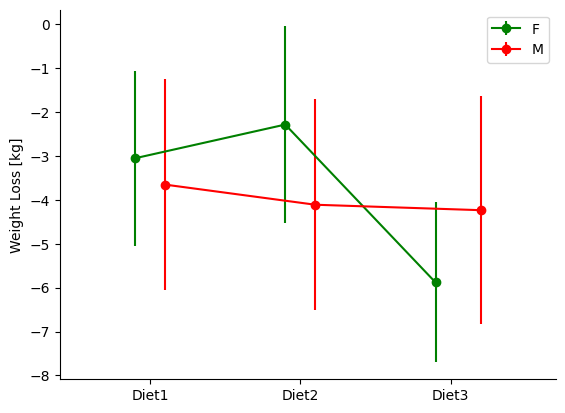

In [25]:
fig, ax = plt.subplots()
ax.errorbar([1, 2, 3], [mean_diet1F, mean_diet2F, mean_diet3F],
            yerr=[std_diet1F, std_diet2F, std_diet3F],
            marker='o', color='g', linestyle='-')
ax.errorbar([1.2, 2.2, 3.3], [mean_diet1M, mean_diet2M, mean_diet3M],
            yerr=[std_diet1M, std_diet2M, std_diet3M],
            marker='o', color='r', linestyle='-')
ax.set_xticks([1.1, 2.1, 3.1])
ax.set_xticklabels(['Diet1', 'Diet2', 'Diet3'])
ax.set_ylabel('Weight Loss [kg]')
ax.set_xlim([0.5, 3.8])
ax.legend(['F', 'M'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Nel caso dell'ANOVA, l'ipotesi nulla prevede che i dati di tutti i gruppi abbiano la stessa origine, ovvero la stessa distribuzione stocastica, e che le differenze osservate tra i gruppi siano dovute solo al caso.

In [26]:
# Creating DataFrame from the data
df2 = pd.DataFrame({'outcome_variable': WeightLoss,
                   'factor1': Diet,
                   'factor2': gender})

# Defining the model
model = ols('outcome_variable ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=df2).fit()

# Model:
# WeightLoss = β0 + β1(Diet) + β2(Gender) + β3(Diet×Gender) + ε

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

In [27]:
anova_table

,sum_sq,df,F,PR(>F)
C(factor1),70.470330,2.0,6.534709,0.002467
C(factor2),1.035165,1.0,0.191982,0.662584
C(factor1):C(factor2),40.919962,2.0,3.794506,0.027118
Residual,388.224133,72.0,NaN,NaN


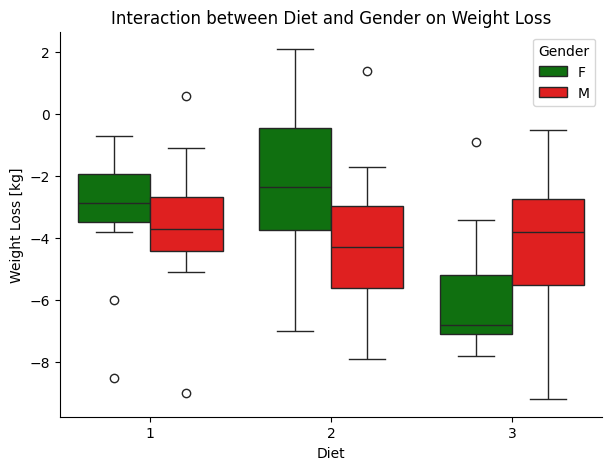

In [29]:
import seaborn as sns


# Custom colors for F and M
palette = {0: 'g', 1: 'r'}

# Create a new DataFrame for visualization
df2['gender_label'] = df2['factor2'].map({0: 'F', 1: 'M'})  # Map 0 to 'F' and 1 to 'M'

# Create the subplot
fig, ax = plt.subplots(figsize=(7, 5))

# Create the boxplot
sns.boxplot(x='factor1', y='outcome_variable', hue='factor2', data=df2, palette=palette, ax=ax)

# Remove spines (top and right)
sns.despine(top=True, right=True)

# Customize title and labels
ax.set_title('Interaction between Diet and Gender on Weight Loss')
ax.set_xlabel('Diet')
ax.set_ylabel('Weight Loss [kg]')

# Correct the legend (map 0 to 'F' and 1 to 'M')
handles, labels = ax.get_legend_handles_labels()
labels = ['F', 'M']  # Correct the legend labels
ax.legend(handles, labels, title='Gender', loc='upper right')

# Show plot
plt.show()


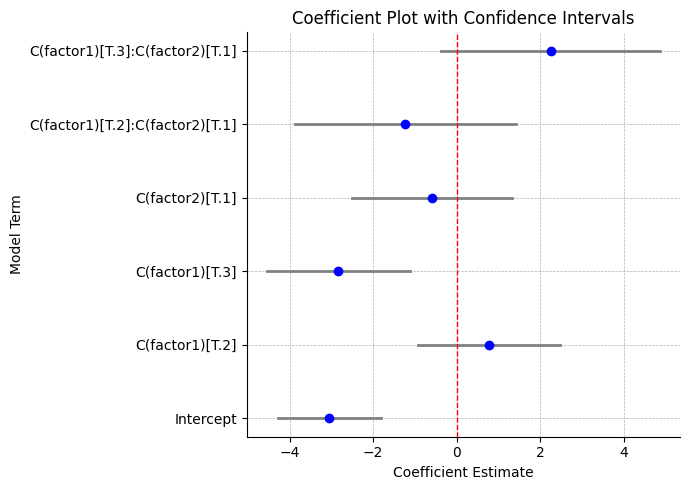

In [30]:
# Extract coefficients and confidence intervals
# WeightLoss = β0 + β1(Diet) + β2(Gender) + β3(Diet×Gender) + ε
coef = model.params
conf = model.conf_int()
conf.columns = ['lower_bound', 'upper_bound']

# Combine into one DataFrame
coef_df = pd.concat([coef, conf], axis=1).reset_index()
coef_df.columns = ['term', 'coef', 'lower_bound', 'upper_bound']

# coefficient plot (sometimes called a "forest plot"
fig, ax = plt.subplots(figsize=(7, 5))

# Scatter plot for coefficients
ax.scatter(coef_df['coef'], coef_df['term'], color='blue', zorder=3)

# Error bars for confidence intervals
for idx, row in coef_df.iterrows():
    ax.plot([row['lower_bound'], row['upper_bound']], [row['term'], row['term']],
             color='gray', lw=2)

# Add a vertical line at 0
ax.axvline(x=0, color='red', linestyle='--', lw=1)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('Model Term')
ax.set_title('Coefficient Plot with Confidence Intervals')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()
